# Notebook to generate reaction time histogram for each monkey.

This notebook requires the processed behavior data for the triangle task, saved
in `../../../cache/behavior/triangle.csv`. This can be downloaded from the GitHub
repo or can be generated by running the script
`../../../behavior_processing/run_cache_data.py`.

In [1]:
"""Imports."""

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import sys
sys.path.append('../../../behavior_processing')
import load_triangle_data
import load_ring_data

# Matplotlib settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.dpi'] = 300

In [2]:
"""Load data."""

df_triangle = load_triangle_data.load_data()
df_triangle = df_triangle[df_triangle["on_triangle"]]
df_ring = load_ring_data.load_data()

# Combine dataframes with only "num_objects", "correct", and "subject" columns
df_triangle = df_triangle[["num_objects", "correct", "subject", "reaction_time", "completed"]]
df_ring = df_ring[["num_objects", "correct", "subject", "reaction_time", "completed"]]
df_triangle["task"] = "triangle"
df_ring["task"] = "ring"
df = pd.concat([df_triangle, df_ring])

# Rename subject column to "P" and "E" instead of "Perle" and "Elgar"
df["subject"] = df["subject"].apply(lambda x: x[0])

# Convert reaction time from seconds to milliseconds
df["Reaction time (ms)"] = df["reaction_time"] * 1000

# Create a new column "Correct" with values "Correct" or "Incorrect"
df["Correct"] = df["correct"].apply(lambda x: "Correct" if x else "Incorrect")
df = df.drop(columns=["correct", "reaction_time"])

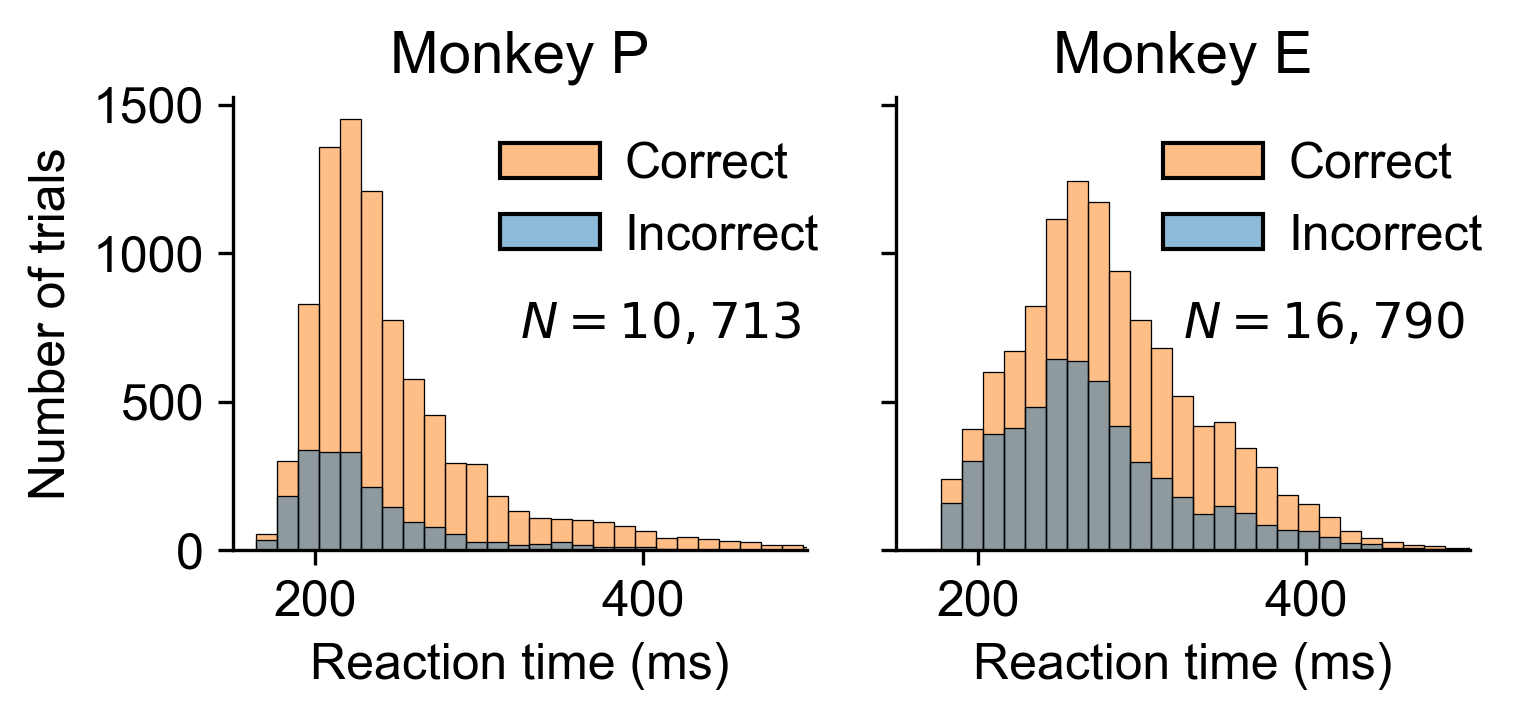

In [3]:
""""Plot reaction time distribution per response location."""

# Histogram reaction time per number of objects per subject
fig, axes = plt.subplots(1, 2, figsize=(5.2, 2.5), sharey=True)
for subject, ax in zip(['P', 'E'], axes):
    sns.despine(ax=ax)
    df_tmp = df[
        (df['completed'])
        & (df['subject'] == subject)
        & (df['task'] == 'triangle')
    ]
    sns.histplot(
        data=df_tmp,
        x='Reaction time (ms)',
        hue='Correct',
        ax=ax,
        bins=np.linspace(100, 600, 40),
        # stat='density',
        common_norm=False,
        hue_order=["Incorrect", "Correct"],
    )
    ax.set_title(f'Monkey {subject}')
    ax.set_ylabel('Number of trials')
    n_trials = df_tmp.shape[0]
    
    # Format with columns for thousands
    n_trials_string = '{:,}'.format(n_trials)
    ax.text(0.5, 0.55, f'$N={n_trials_string}$', transform=ax.transAxes, verticalalignment='top', fontsize=12)
    
    # Adjust x-axis limits
    ax.set_xlim(150, 500)
    
    # Make legend with no title, and with labels "Incorrect" and "Correct"
    sns.move_legend(
        ax,
        "upper right",
        title=None,
        bbox_to_anchor=(1.1, 1.0),
        frameon=False,
        fontsize=12,
        reverse=True,
        handletextpad=0.5,
    )
    
fig.tight_layout()
fig.savefig('reaction_time_per_subject.pdf', bbox_inches='tight', pad_inches=0.01)